In [76]:
import pandas as pd
import numpy as np
import os
%matplotlib inline

In [77]:
raw_file_path = os.path.join(os.path.pardir, 'data', 'raw', 'Training_data.xlsx')

In [78]:
df = pd.read_excel(raw_file_path)

In [79]:
df.head()

,ProductModelNo,ManufacturingCost,SellingCost,ProfitMargin,MarketShare,WarrantyPeriod,ServiceCenter,ClaimsMadeByCustInWarranty,RepairExpenditureDuringWarranty,ReplacementExpenditureDuringWarranty,FrequentFaults,FixedServiceCost,ProductLifeSpan
0,1,100,120,16.666667,10,1,40,10,20,10.0,1,31.2,3
1,2,206,230,10.434783,14,1,50,15,45,22.5,2,72.9,3
2,3,309,320,3.437500,15,1,60,15,60,30.0,3,100.8,3
3,4,412,450,8.444444,16,1,70,10,20,10.0,1,31.2,3
4,5,515,550,6.363636,12,2,30,40,120,60.0,1,183.6,3


In [80]:
df.shape

(23, 13)

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 13 columns):
ProductModelNo                          23 non-null int64
ManufacturingCost                       23 non-null int64
SellingCost                             23 non-null int64
ProfitMargin                            23 non-null float64
MarketShare                             23 non-null int64
WarrantyPeriod                          23 non-null int64
ServiceCenter                           23 non-null int64
ClaimsMadeByCustInWarranty              23 non-null int64
RepairExpenditureDuringWarranty         23 non-null int64
ReplacementExpenditureDuringWarranty    23 non-null float64
FrequentFaults                          23 non-null int64
FixedServiceCost                        23 non-null float64
ProductLifeSpan                         23 non-null int64
dtypes: float64(3), int64(10)
memory usage: 2.4 KB


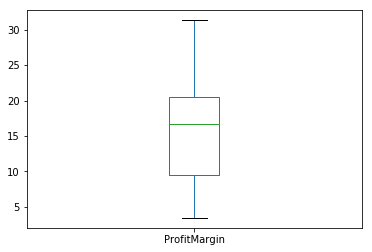

In [82]:
df.ProfitMargin.plot(kind='box')

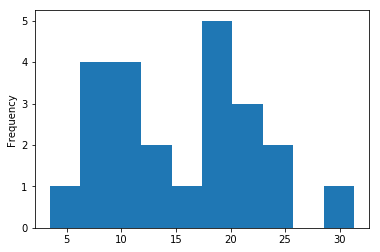

In [83]:
df.ProfitMargin.plot(kind='hist')

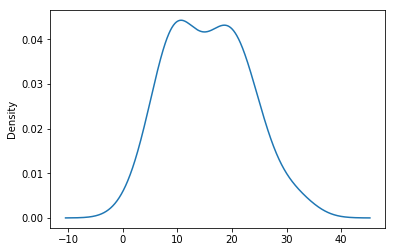

In [84]:
df.ProfitMargin.plot(kind='kde')

## step1: predict product margin

### split data into training and test as 80/20 for cross validation

In [85]:
#convert input and output features
#reorder columns
columns = [column for column in df.columns if column != 'ProfitMargin']
columns = ['ProfitMargin'] + columns
df = df[columns]

X = df.loc[:, 'ProductModelNo':].as_matrix().astype('int64')
y = df['ProfitMargin'].ravel()

In [86]:
print(X.shape)
print(y.shape)

(23, 12)
(23,)


In [87]:
#split data into 80/20 using train_test_split function
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [88]:
print("train: {0}, {1}".format(X_train.shape, y_train.shape))
print("test: {0}, {1}".format(X_test.shape, y_test.shape))

train: (16, 12), (16,)
test: (7, 12), (7,)


In [89]:
#chack for average survival 
print("Average survival for train: {0:.3f}".format(np.mean(y_train)))
print("Average survival for test: {0:.3f}".format(np.mean(y_test)))

Average survival for train: 14.081
Average survival for test: 18.985


In [90]:
#import logistic regression
from sklearn.linear_model import LogisticRegression
logisticRg_model = LogisticRegression(random_state = 0)
logisticRg_model.fit(X_train, y_train)

ValueError: Unknown label type: 'continuous'